In [1]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

matplotlib.__version__

'2.0.1'

In [2]:
def get_Bp(energy, charge, mass):
    return (1.0e6 * np.sqrt(energy**2 + 2 * energy * mass * amu_MeV) / (charge * speed_of_light))

def get_Ep(energy, charge):
    return 2 * energy / charge

So, let's set up the energies that we want to cover. The astrophysically relevant resonances are at 2005 and 3976 keV (for the Nitrogen beam), and we'd like to explore as much of the space around those resonances as well. What we actually have to accept is the Flourine recoils, so we need to look at those energies.

In [3]:
amu_MeV = 931.494061  # MeV/c^2
speed_of_light = 299792458.0  # m/s

# below all in amu
mass_N14 = 14.00307400478
mass_alpha = 4.00260325415
mass_F18 = 18.000937956

energy_CM = np.linspace(0.15, 1.1, 1000)  # MeV
energy_N14 = mass_F18 * energy_CM / mass_alpha
energy_F18 = energy_N14 * (mass_N14 / mass_F18)

bp_f18 = get_Bp(energy_F18, 3, mass_F18)
ep_f18 = get_Ep(energy_F18, 3)

In [4]:
mass_p = 1.00782503207
# mass_Al27 = 26.981538627
# mass_Mg24 = 23.985041699

# mass_A = mass_Al27 + mass_p
# mass_B = mass_Mg24 + mass_alpha

# Q = 1.601

# energy_p = np.linspace(0.8, 1.5, 1000)  # MeV
# energy_alpha = mass_Mg24 * (Q + energy_p * (1 - mass_p / (mass_B))) / mass_B
# bp_alpha = get_Bp(energy_alpha, 2, mass_alpha)
# ep_alpha = get_Ep(energy_alpha, 2)

# resonances = np.array([1.18, 1.36])  # proton energy
# resonances_alpha = mass_Mg24 * (Q + resonances * (1 - mass_p / (mass_B))) / mass_B

In [5]:
get_Bp(2, 1, mass_p), get_Ep(2, 1)

(0.2045140232964138, 4.0)

In [6]:
# C12(a,g)O16

mass_C12 = 12.0
mass_O16 = 15.99491462
Q = 7161.92

energy_CM = np.linspace(0.7, 2.5, 1000) # MeV
energy_C12 = mass_O16 * energy_CM / mass_alpha
energy_O16 = mass_O16 * energy_CM / mass_alpha * (mass_C12 / mass_O16)

bp_o16 = get_Bp(energy_O16, 4, mass_O16)
ep_o16 = get_Ep(energy_O16, 4)

In [7]:
# He3(a,g)7Be

mass_3He = 3.01602932
mass_7Be = 7.01692983
Q = 1587.13

energy_CM = np.linspace(0.15, 0.7, 1000)  # MeV
energy_3He = mass_7Be * energy_CM / mass_alpha
energy_7Be = mass_7Be * energy_CM / mass_alpha * (mass_3He / mass_7Be)

bp_be7 = get_Bp(energy_7Be, 1, mass_7Be)
ep_be7 = get_Ep(energy_7Be, 1)

/opt/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


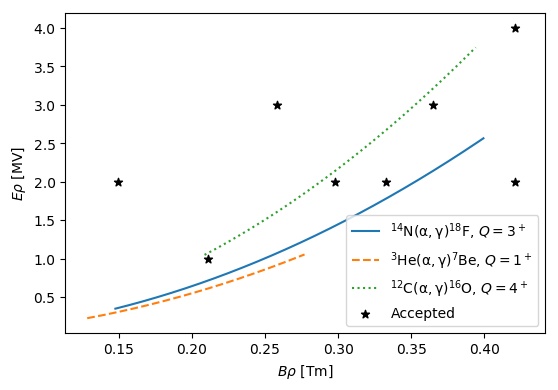

In [10]:
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

# plt.rc('text', usetex=True)
# plt.rc('font', family='serif')

fig = plt.figure(dpi=100)

ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

# add in measured points
bp_accept = (0.211, 0.149, 0.298, 0.421, 0.258, 0.365, 0.421, 0.333)
ep_accept = (1., 2., 2., 2., 3., 3., 4., 2.)
ax.scatter(bp_accept, ep_accept, marker='*', color='k',
#            s=200,
           label='Accepted')

# plt.plot(bp_alpha, ep_alpha,
#          label=r'${}^{27}\rm{Al}(\rm{p},\alpha){}^{24}\rm{Mg}$, $Q = 2^+$')#, color='#1B9E77')
# plt.scatter(get_Bp(resonances_alpha, 2, mass_alpha), get_Ep(resonances_alpha, 2),
#             marker='o', color='#1B9E77', s=100)
ax.plot(bp_f18, ep_f18,
         label=r'${}^{14}\rm{N}(\alpha,\gamma){}^{18}\rm{F}$, $Q = 3^+$')
ax.plot(bp_be7, ep_be7, linestyle='dashed',
         label=r'${}^{3}\rm{He}(\alpha,\gamma){}^{7}\rm{Be}$, $Q = 1^+$')
ax.plot(bp_o16, ep_o16, linestyle='dotted',
         label=r'${}^{12}\rm{C}(\alpha,\gamma){}^{16}\rm{O}$, $Q = 4^+$')

# ax.set_xlim((0.1, 0.45))
ax.set_xlabel(r'$B\rho$ [Tm]')
# ax.set_ylim((0.0, 4.5))
ax.set_ylabel(r'$E\rho$ [MV]')
# ax.legend(loc='upper left', framealpha=1., frameon=True, fontsize='small')
ax.legend(loc='lower right')

# ax.get_yaxis().set_tick_params(pad=4.9)
# ax.get_xaxis().set_tick_params(pad=7)

plt.show()
# fig.tight_layout()
fig.savefig('../dissertation/figures/rigidity_phase_space.png', bbox_inches='tight')

In [11]:
energy_N14.min(), energy_N14.max()

(0.67459613705166155, 4.9470383383788521)

In [12]:
energy_3He.min(), energy_3He.max()

(0.26296372827076986, 1.2271640652635927)

In [13]:
energy_C12.min(), energy_C12.max()

(2.7972895445960693, 9.9903198021288198)

In [14]:
fig.dpi

100